# Machine Learning Fundamentals - Probability Theory - Exercise: D-Separation

## Table of Contents
* [Introduction](#Introduction)
* [Requirements](#Requirements)
  * [Knowledge](#Knowledge)
  * [Modules](#Python-Modules)
* [D-Separation](#D-Separation)
  * [Exercise: Active Triples](#Exercise:-Active-Triples)
  * [Exercise: D-Separation](#Exercise:-D-Separation)
  * [Exercise: Independence](#Exercise:-Independence)
* [Summary and Outlook](#Summary-and-Outlook)
* [Literature](#Literature)
* [Licenses](#Licenses)

## Introduction

In the notebook [Bayesian Networks by Example](bayesian-networks-by-example.ipynb) the concept of active or blocked node triples in bayesian network graphs has been introduced. An active node triple means, that the lefthand node and the righthand node are not necessarily independent, given the node in the middle. For example the triple $I \rightarrow G \rightarrow L$ represents a **causal effect**. This means $I$ and $L$ are not necessarily independent if $G$ is unobserved, but become independent given that $G$ is observed. Other node constellations are **common effect** and **common cause**, which impose different rules for a triple being active or not (see [Bayesian Networks by Example](bayesian-networks-by-example.ipynb) for more details).

Using the d-separation algorithm, we can expand this concept to arbitrarily long paths between two nodes. The algorithm looks at all possible node triples along a path and checks if they are blocked. If only one triple is blocked, the whole path is blocked.

To complete the exercises in this notebook, you implement the following **generic** functions using the Python module `networkx`:

1. check if a triple of nodes in a bayesian network is active
2. run d-separation on a path
3. decide if two nodes are independent by checking all possible paths between them.

## Requirements

### Knowledge

* [Notebook: Bayesian Networks by Example](bayesian-networks-by-example.ipynb)

Read about D-Separation in Chapter 3 of Probabilistic Graphical Models - Principles and Techniques [[KOL09](#KOL09)]

### Python Modules

In [ ]:
# Python Standard Library
import os
import pandas as pd
from collections import OrderedDict, Counter

# External Modules
import networkx as nx

### Data

Given the following graph:

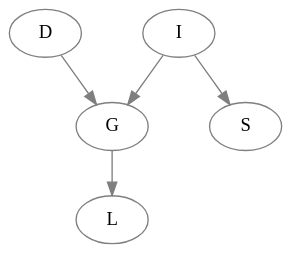

In [ ]:
def student_bayes_net():
    g = nx.DiGraph()

    g.add_node('I', pos=(100, 0))
    g.add_node('D', pos=(0, 0))
    g.add_node('S', pos=(150, -70))
    g.add_node('G', pos=(50, -70))
    g.add_node('L', pos=(50, -140))

    g.add_edge('I', 'S')
    g.add_edge('I', 'G')
    g.add_edge('D', 'G')
    g.add_edge('G', 'L')

    return g

g = student_bayes_net()

## D-Separation

### Exercise: Active Triples

As a first exercise, implement the function `active(nx_di_graph, triple)`, where `nx_di_graph` is an arbitrary directed acyclic `networkx` graph as for example the student example graph `g` given above. The function parameter `triple` is a list or tuple of 3 node names. The function should return `True`, if the triple is active, otherwise `False`.

Here some hints, to help you with the implementation:

1. Your function `active` should **at least** pass all tests in `test_active`. But even if it passes all the tests, it does not mean that it is fully functional.
2. You can implement as many helper functions as you want.
3. The function should throw some kind of exception, if the input parameters do not make sense. You can use `assert` or `raise Exception()`.
4. Take a look at the `networkx` code samples below

In [ ]:
list(g.predecessors('G'))

In [ ]:
list(g.successors('G'))

In [ ]:
# check if a node is observed
g.nodes['G'].get('observed', False)

In [ ]:
g.nodes['G']['observed'] = True
g.nodes['G'].get('observed', False)

In [ ]:
# implement the following function
def active(nx_di_graph, triple):
    # your code goes here
    raise NotImplementedError()

In [ ]:
active(g, ['I', 'G', 'L'])

In [ ]:
# run this cell to test your function
# the tests are successful if no exception is raised
def test_active():
    def exception_raised(nx_di_graph, triple):
        raised = False
        try:
            active(nx_di_graph, triple)
        except:
            raised = True
        return raised
    
    g = student_bayes_net()
    
    assert active(g, ['I', 'G', 'L'])
    assert active(g, ['L', 'G', 'I'])
    assert active(g, ['G', 'I', 'S'])
    assert not active(g, ['D', 'G', 'I'])
    
    assert exception_raised(g, ['L', 'I', 'G'])
    assert exception_raised(g, ['I', 'S', 'G'])
    assert exception_raised(g, ['I'])
    assert exception_raised(g, ['I', 'S'])
    assert exception_raised(g, ['L', 'G', 'I', 'S'])
    assert exception_raised(g, ['I', 'I', 'G'])
    
    g.nodes['G']['observed'] = True
    assert active(g, ['D', 'G', 'I'])
    assert not active(g, ['D', 'G', 'L'])
    assert not active(g, ['L', 'G', 'I'])
    
    g.nodes['G']['observed'] = False
    g.nodes['L']['observed'] = True
    assert active(g, ['D', 'G', 'I'])
    
    g.nodes['L']['observed'] = False
    g.add_node('X', observed=True)
    g.add_edge('L', 'X')
    assert active(g, ['D', 'G', 'I'])
    
    g.nodes['X']['observed'] = False
    g.add_node('Y', observed=True)
    g.add_edge('L', 'Y')
    assert active(g, ['D', 'G', 'I'])
    
test_active()

### Exercise: D-Separation

Implement a function `d_separated(nx_di_graph, path)`, where path is a list or tuple of all node names contained in a path in correct order. Remember, that a path in a Bayesian Network does not respect the direction of edges.

In [ ]:
# implement the following function
def d_separated(nx_di_graph, path):
    # your code goes here
    raise NotImplementedError()

In [ ]:
d_separated(g, ['D', 'G', 'I', 'S'])

In [ ]:
def test_d_separated():
    g = student_bayes_net()
    assert not d_separated(g, ['I', 'S'])
    assert not d_separated(g, ['I', 'G', 'L'])
    assert d_separated(g, ['D', 'G', 'I'])
    g.nodes['L']['observed'] = True
    assert not d_separated(g, ['D', 'G', 'I'])
    assert not d_separated(g, ['D', 'G', 'I', 'S'])
    
test_d_separated()

### Exercise: Independence

Implement a function `independent(nx_di_graph, start_node, end_node)`, which returns `True`, if all undirected paths between two nodes are blocked.

In [ ]:
# use the following code snipped to get all undirected paths
tmp = g.to_undirected()
paths = nx.all_simple_paths(tmp, 'L', 'S')
list(paths)

In [ ]:
# implement the following function
def independent(nx_di_graph, start_node, end_node):
    # your code goes here
    raise NotImplementedError()

In [ ]:
independent(g, 'D', 'S')

In [ ]:
def test_independent():
    g = student_bayes_net()
    assert not independent(g, 'I', 'S')
    assert not independent(g, 'I', 'L')
    assert not independent(g, 'L', 'S')
    assert independent(g, 'D', 'I')
    assert independent(g, 'D', 'S')

test_independent()

## Summary and Outlook

By implementing the functions in this notebook, you have learned how to identify active and blocked triples in a Bayesian Network graph, as well as deciding if distant nodes are independent or not. We advise you to learn about advanced inference, like variable elimination, and about special types of Bayesian Networks like Naive Bayes and Hidden Markov Models.

## Literature

<table>
    <tr>
        <td>
            <a name="KOL09"></a>[KOL09]
        </td>
        <td>
            D. Koller and N. Friedman, “Probabilistic Graphical Models - Principles and Techniques”, Chapter 3, Massachusetts Institute of Technology, USA, 2009.
        </td>
    </tr>
</table>

## Licenses

### Notebook License (CC-BY-SA 4.0)

*The following license applies to the complete notebook, including code cells. It does however not apply to any referenced external media (e.g., images).*

_Notebook title_ <br/>
by _Author (provide a link if possible)_ <br/>
is licensed under a [Creative Commons Attribution-ShareAlike 4.0 International License](http://creativecommons.org/licenses/by-sa/4.0/).<br/>
Based on a work at https://gitlab.com/deep.TEACHING.


### Code License (MIT)

*The following license only applies to code cells of the notebook.*

Copyright 2018 _Author_

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.